In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
from tensorflow.python.framework import ops

In [2]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
def load_dataset():
    train_dataset = h5py.File('C:\\Users\\hp\\Music\\coursera-deep-learning-specialization-master\\C2 - Improving Deep Neural Networks Hyperparameter tuning, Regularization and Optimization\\Week 3\\datasets\\train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    print(train_dataset)
    test_dataset = h5py.File('C:\\Users\\hp\\Music\\coursera-deep-learning-specialization-master\\C2 - Improving Deep Neural Networks Hyperparameter tuning, Regularization and Optimization\\Week 3\\datasets\\test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

<HDF5 file "train_signs.h5" (mode r)>


y = 2


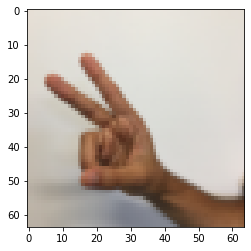

In [5]:
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [6]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [7]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print(Y_train.shape)

(1080, 6)


y = 2


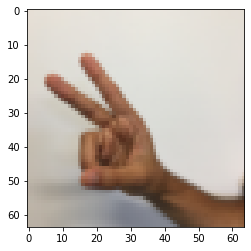

In [8]:
index = 6
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [9]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :, :, :]
    shuffled_Y = Y[permutation, :]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    # number of mini batches of size mini_batch_size in your partitionning
    num_complete_minibatches = math.floor(m / mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size: k *
                                  mini_batch_size + mini_batch_size, :, :, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size: k *
                                  mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches *
                                  mini_batch_size: m, :, :, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches *
                                  mini_batch_size: m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


In [10]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X=tf.placeholder(tf.float32,[None,n_H0,n_W0,n_C0],name='X')
    Y=tf.placeholder(tf.float32,[None,n_y],name='Y')
    return X,Y

In [11]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Y:0", shape=(?, 6), dtype=float32)


In [12]:
def initialize_parameters():
    initializer=tf.initializers.he_uniform()
    W1=tf.Variable(initializer(shape=[4,4,3,8]))
    W2=tf.Variable(initializer(shape=[2,2,8,16]))
    parameters={"W1":W1,
               "W2":W2}
    return parameters

In [13]:
parameters=initialize_parameters()

In [14]:
print(parameters)

{'W1': <tf.Variable 'Variable:0' shape=(4, 4, 3, 8) dtype=float32_ref>, 'W2': <tf.Variable 'Variable_1:0' shape=(2, 2, 8, 16) dtype=float32_ref>}


In [15]:
def forward_propagation(X,parameters):
    W1=parameters["W1"]
    W2=parameters["W2"]
    Z1=tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    A1=tf.nn.relu(Z1)
    Z2=tf.nn.max_pool(A1,ksize=[1,8,8,1],strides=[1,8,8,1],padding='SAME')
    Z3=tf.nn.conv2d(Z2,W2,strides=[1,1,1,1],padding='SAME')
    A3=tf.nn.relu(Z3)
    Z4=tf.nn.max_pool(A3,ksize=[1,4,4,1],strides=[1,4,4,1],padding='SAME')
    F1=tf.layers.flatten(Z4)
    A4=tf.layers.dense(F1,units=6,activation=None)
    return A4
    

In [16]:
def compute_cost(Z3,Y):
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits =Z3, labels = Y))
    
    return cost

In [17]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,num_epochs = 100, minibatch_size = 64, print_cost = True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    (m,n_H0,n_W0,n_C0)=X_train.shape
    n_y=Y_train.shape[1]
    seed=3
    costs=[]
    X,Y=create_placeholders(n_H0, n_W0, n_C0, n_y)
    parameters=initialize_parameters()
    Z3=forward_propagation(X,parameters)
    cost=compute_cost(Z3,Y)
    optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            minibatch_cost=0
            seed=seed+1
            num_minibatches=int(m/minibatch_size)
            mini_batches=random_mini_batches(X_train,Y_train,minibatch_size)
            for mini_batch in mini_batches:
                (minibatch_X,minibatch_Y)=mini_batch
                temp_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
            minibatch_cost+=temp_cost[1]/num_minibatches
            if print_cost == True and epoch % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch,minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)    
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()               
        predict_op=tf.argmax(Z3,1)
        correct_prediction=tf.equal(predict_op,tf.argmax(Y,1))
        print(correct_prediction)
        accuracy=tf.reduce_mean(tf.cast(correct_prediction,float))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        return train_accuracy, test_accuracy, parameters

In [18]:
parameters = model(X_train, Y_train, X_test, Y_test,learning_rate=0.015,num_epochs=150)

AttributeError: module 'tensorflow.compat.v1' has no attribute 'regularizers'